<a href="https://colab.research.google.com/github/salomon-alvarez/churn_prediction_project/blob/main/churn_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read into pandas (replace 'your_file.csv' with the uploaded filename)
df = pd.read_csv("Churn_Modelling.csv")

df.head()

Saving Churn_Modelling.csv to Churn_Modelling.csv


,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


## Data Cleaning
### Handling missing values

In [4]:
df.isnull().any()

,0
CustomerId,False
CredRate,False
Geography,False
Gender,True
Age,True
Tenure,False
Balance,False
Prod Number,False
HasCrCard,False
ActMem,False


In [6]:
df.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Count distinct values in the "Gender" column
df["Gender"].value_counts()

,count
Gender,
Male,5453
Female,4543


In [8]:
df["Gender"].fillna("Male", inplace=True)

/tmp/ipython-input-4132186541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna("Male", inplace=True)


In [10]:
df["Gender"].isna().sum()

np.int64(0)

### Handling Missing Values in Gender Column

The `Gender` column contained missing values. Since the majority of entries were labeled as **Male**, I filled the null values with `"Male"` to maintain consistency and reduce bias in the dataset.

In [11]:
# Calculate the mean salary (excluding nulls)
mean_salary = df["EstimatedSalary"].mean()

# Replace nulls with the mean
df["EstimatedSalary"] = df["EstimatedSalary"].fillna(mean_salary)

df["EstimatedSalary"].isna().sum()

np.int64(0)

### Handling Missing Values in EstimatedSalary

The `EstimatedSalary` column contained missing values. To preserve the overall distribution without biasing toward a specific group, I replaced the null values with the **mean salary** of the column.

In [13]:
import math

# Calculate mean and round up
mean_age = math.ceil(df["Age"].mean())

# Replace nulls with the rounded mean
df["Age"] = df["Age"].fillna(mean_age)

# Check if there are any nulls left
print("Nulls in Age column:", df["Age"].isna().sum())

Nulls in Age column: 0


### Handling Missing Values in Age

The `Age` column had missing values. Since the mean age was a decimal, I rounded it **up to the nearest whole number** and used this value to fill the null entries. This ensures the filled values remain realistic as ages are whole numbers.

### Chaging Column Names

In [17]:
# Rename columns
df.rename(columns={
    "CredRate": "Credit_Score",
    "ActMem": "Is_Active_Member",
    "Prod Number": "Num_of_Products",
    "Exited": "Churn",
    "HasCrCard": "Has_Credit_Card"
}, inplace=True)

# Check if changes worked
print(df.columns)

Index(['CustomerId', 'Credit_Score', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num_of_Products', 'Has_Credit_Card', 'Is_Active_Member',
       'EstimatedSalary', 'Churn'],
      dtype='object')


### Changing Data Type

In [18]:
# List of categorical columns
categorical_cols = ["Gender", "Geography", "Is_Active_Member", "Churn", "Has_Credit_Card"]

# Convert to category dtype
for col in categorical_cols:
    df[col] = df[col].astype("category")

# Check dtypes
print(df.dtypes)

CustomerId             int64
Credit_Score           int64
Geography           category
Gender              category
Age                  float64
Tenure                 int64
Balance              float64
Num_of_Products        int64
Has_Credit_Card     category
Is_Active_Member    category
EstimatedSalary      float64
Churn               category
dtype: object


### Data Exploration

In [19]:
df.describe()

,CustomerId,Credit_Score,Age,Tenure,Balance,Num_of_Products,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.925300,5.012800,76485.889288,1.530200,100074.744083
std,7.193619e+04,96.653299,10.486101,2.892174,62397.405202,0.581654,57504.269099
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100134.325000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149382.097500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


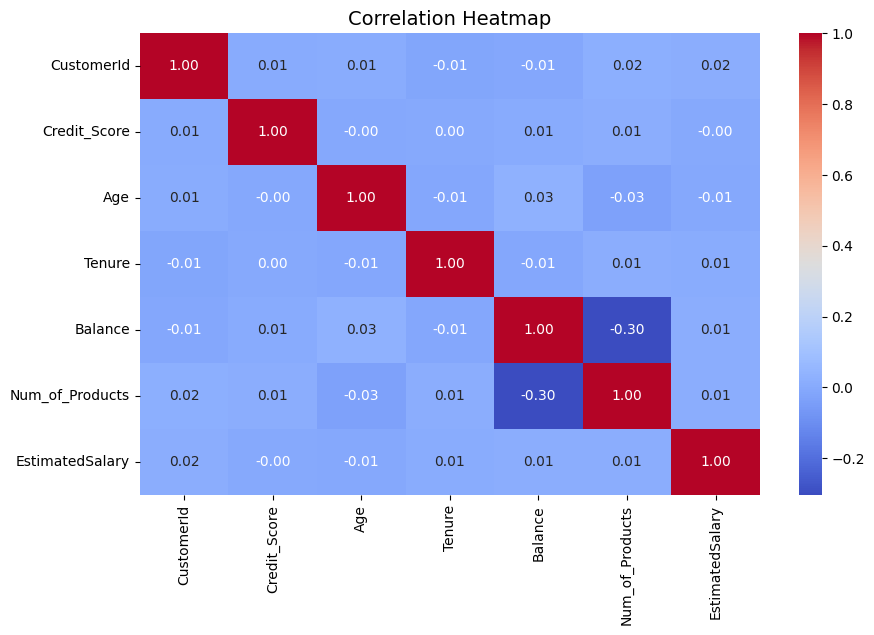

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (only numeric columns)
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [22]:
# Group by Churn, aggregate numeric columns only
summary_stats = df.groupby("Churn")[df.select_dtypes(include="number").columns].agg(["mean", "median"])

# Flatten column names for readability
summary_stats.columns = [f"{col}_{stat}" for col, stat in summary_stats.columns]

summary_stats.reset_index(inplace=True)
summary_stats

/tmp/ipython-input-2905569726.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df.groupby("Churn")[df.select_dtypes(include="number").columns].agg(["mean", "median"])


,Churn,CustomerId_mean,CustomerId_median,Credit_Score_mean,Credit_Score_median,Age_mean,Age_median,Tenure_mean,Tenure_median,Balance_mean,Balance_median,Num_of_Products_mean,Num_of_Products_median,EstimatedSalary_mean,EstimatedSalary_median
0,0,1.569117e+07,15691543.0,651.853196,653.0,37.412784,36.0,5.033279,5.0,72745.296779,92072.68,1.544267,2.0,99718.932023,99645.04
1,1,1.569005e+07,15688963.0,645.351497,646.0,44.837997,45.0,4.932744,5.0,91108.539337,109349.29,1.475209,1.0,101465.677531,102460.84


### Univariate Analysis

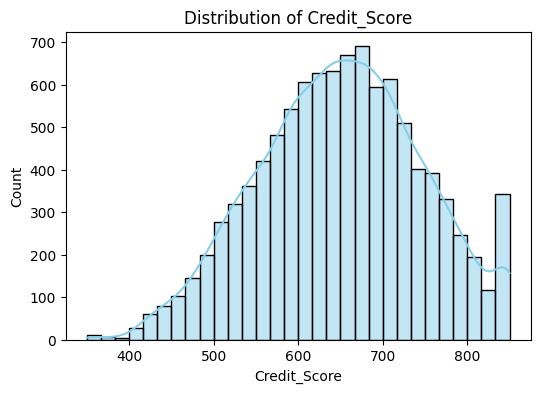

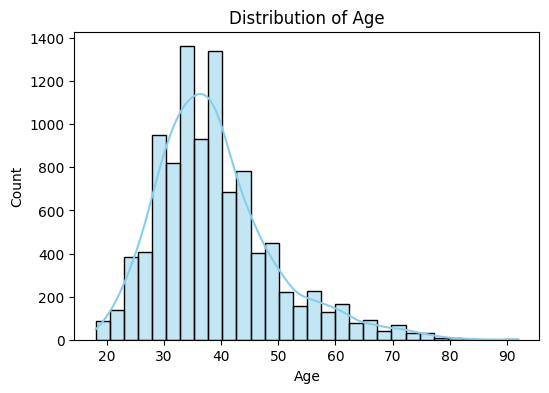

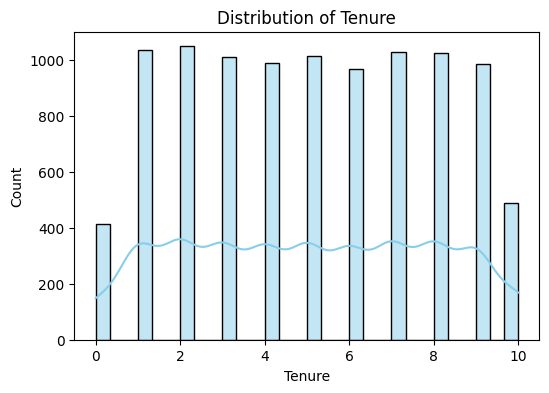

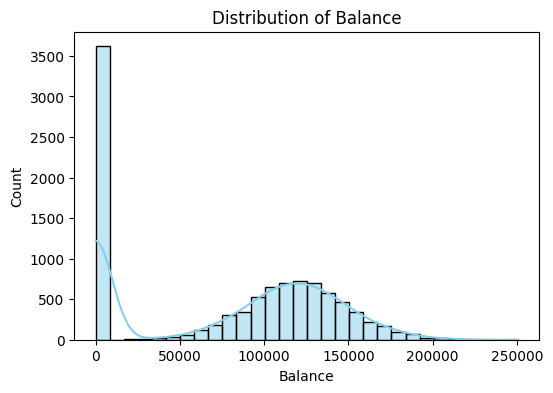

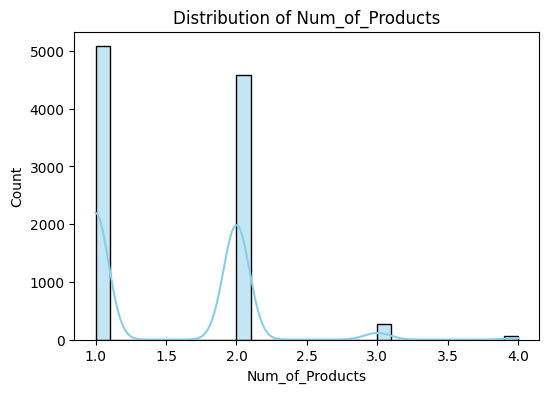

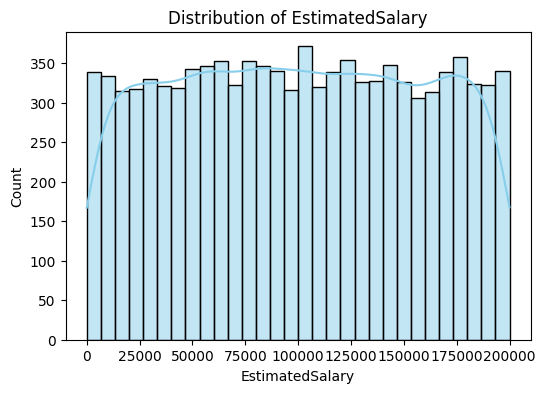

/tmp/ipython-input-978161873.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


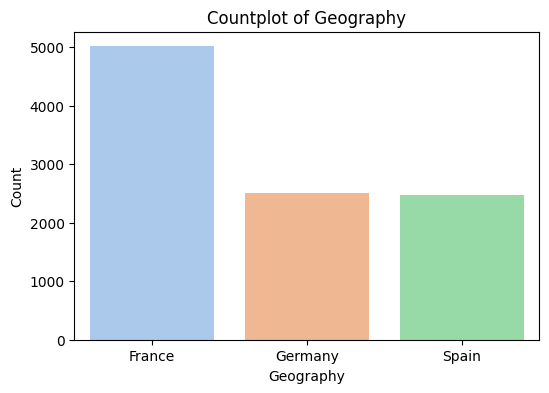

/tmp/ipython-input-978161873.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


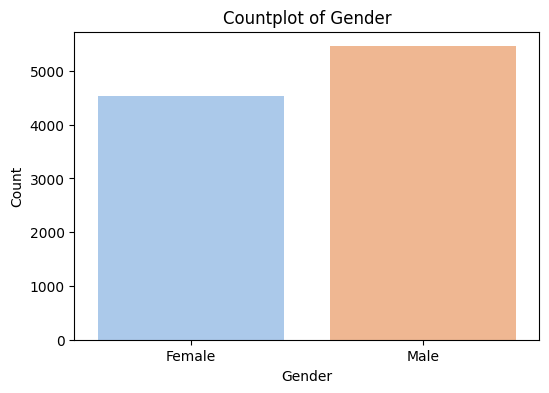

/tmp/ipython-input-978161873.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


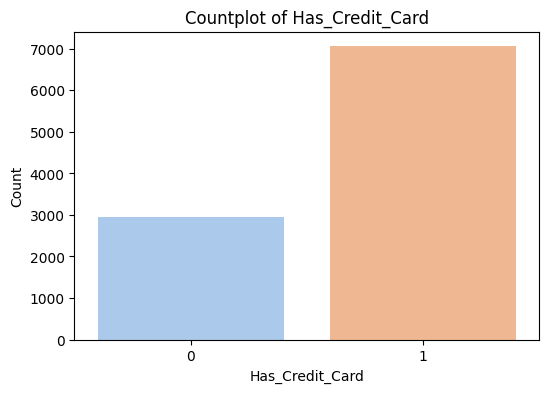

/tmp/ipython-input-978161873.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


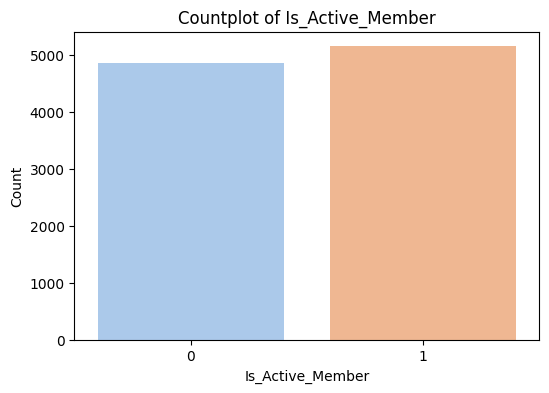

/tmp/ipython-input-978161873.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


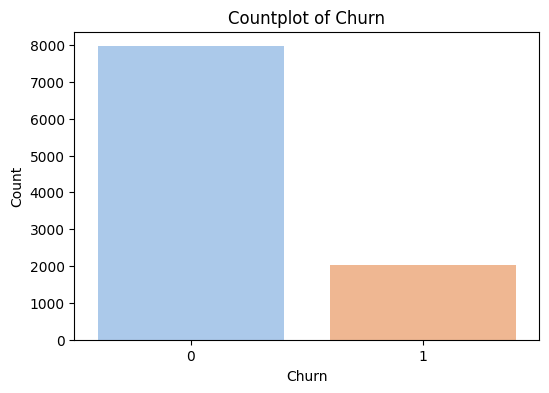

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numeric and categorical columns
numeric_cols = ["Credit_Score", "Age", "Tenure", "Balance", "Num_of_Products", "EstimatedSalary"]
categorical_cols = ["Geography", "Gender", "Has_Credit_Card", "Is_Active_Member", "Churn"]

# Plot numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Plot categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

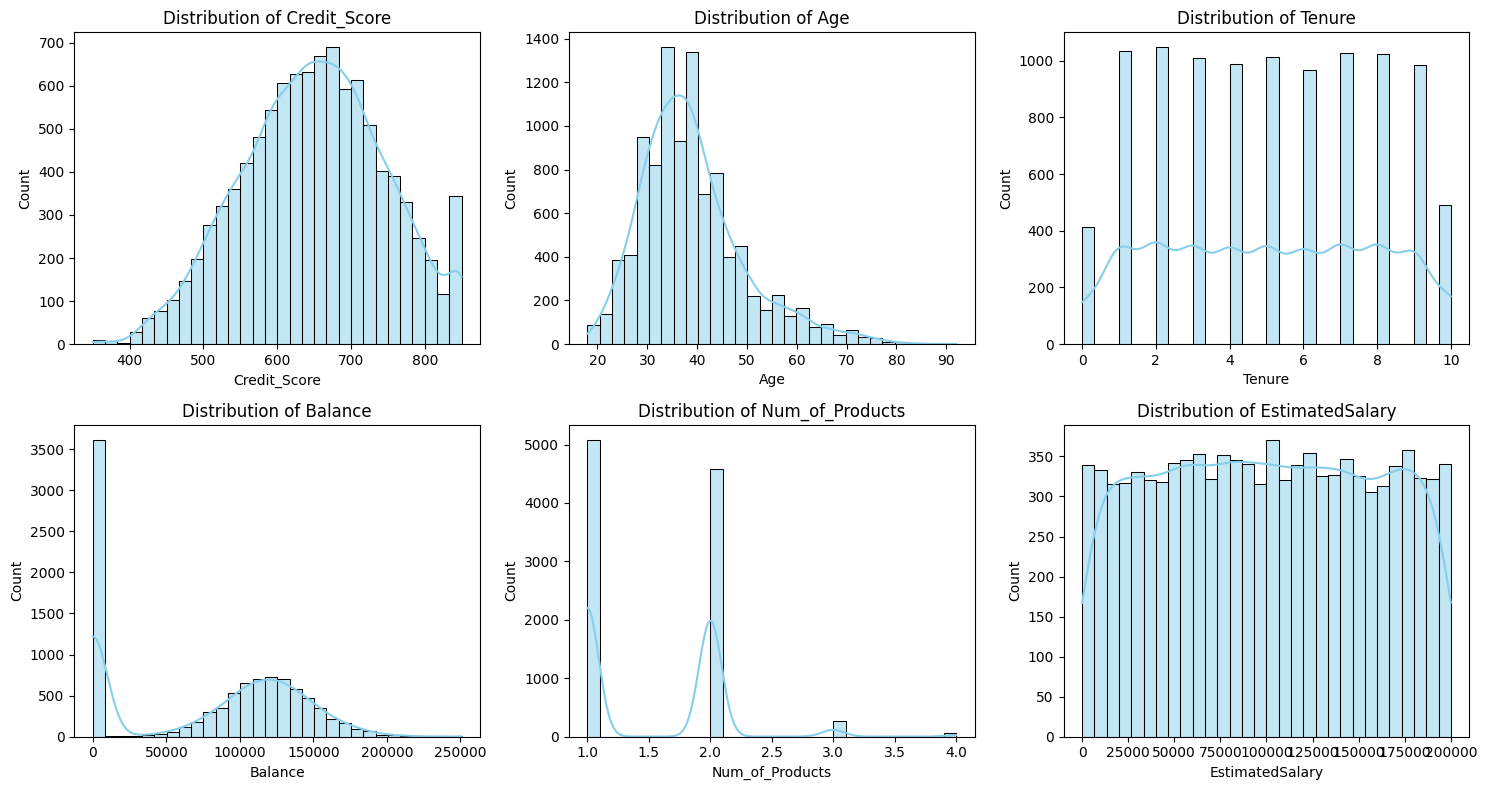

/tmp/ipython-input-518640502.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel", ax=axes[i])
/tmp/ipython-input-518640502.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel", ax=axes[i])
/tmp/ipython-input-518640502.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel", ax=axes[i])
/tmp/ipython-input-518640502.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

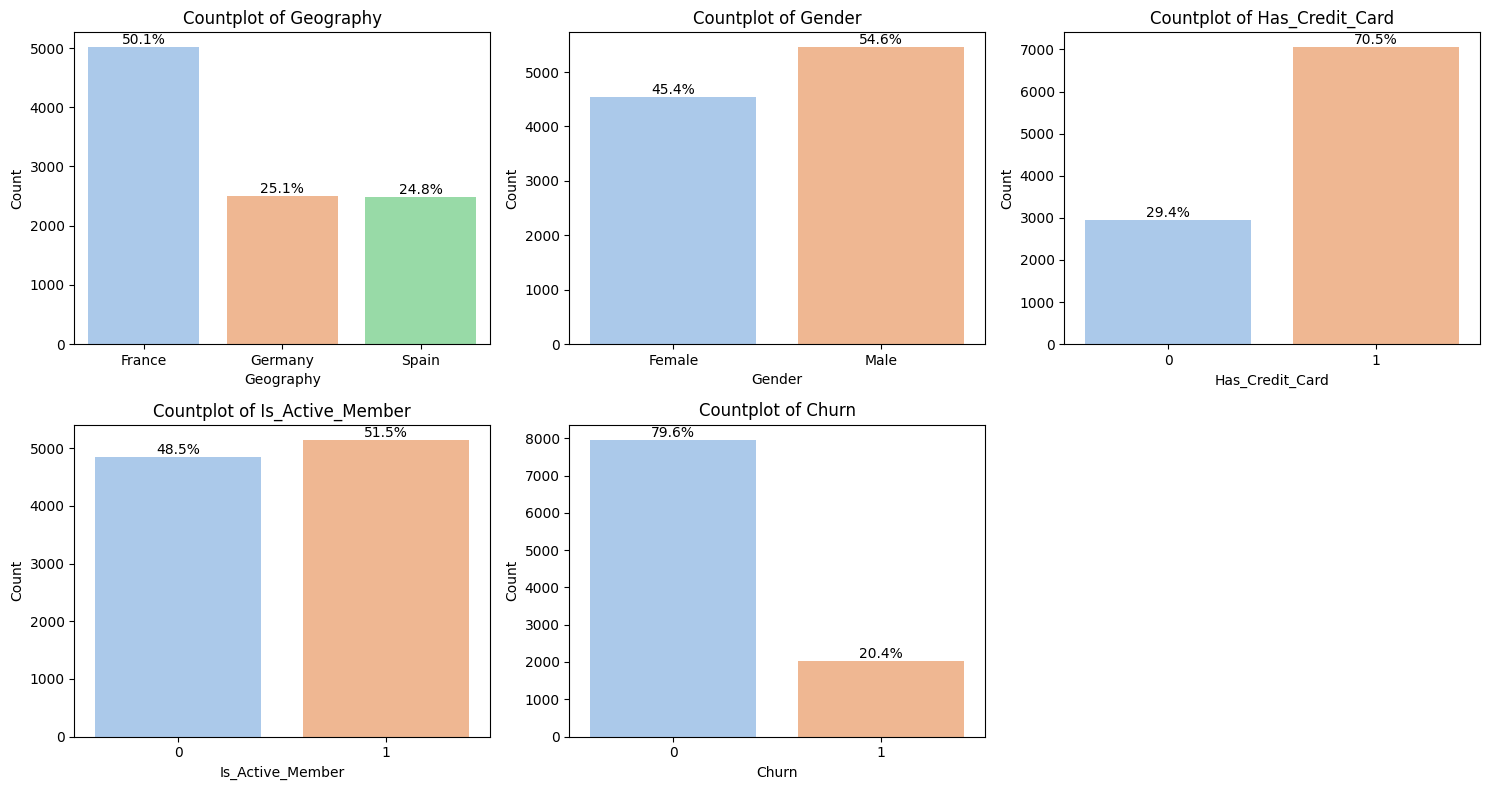

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns
numeric_cols = ["Credit_Score", "Age", "Tenure", "Balance", "Num_of_Products", "EstimatedSalary"]
categorical_cols = ["Geography", "Gender", "Has_Credit_Card", "Is_Active_Member", "Churn"]

# --- Numeric columns ---
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, color="skyblue", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# --- Categorical columns ---
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, palette="pastel", ax=axes[i])
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_ylabel("Count")
    # Add percentages
    total = len(df[col])
    for p in axes[i].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha="center", va="bottom")

# Hide any unused subplot slots (since we only have 5 categorical columns)
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [25]:
# Select numeric columns
numeric_cols = ["Credit_Score", "Age", "Tenure", "Balance", "Num_of_Products", "EstimatedSalary"]

# Calculate skewness
skewness = df[numeric_cols].skew()

# Display as a DataFrame for readability
import pandas as pd
skew_df = pd.DataFrame({"Feature": skewness.index, "Skewness": skewness.values})
skew_df

,Feature,Skewness
0,Credit_Score,-0.071607
1,Age,1.011173
2,Tenure,0.010991
3,Balance,-0.141109
4,Num_of_Products,0.745568
5,EstimatedSalary,0.002713


### Skewness Analysis

Skewness measures the asymmetry of the distribution of values in a feature:  
- **0** → perfectly symmetric  
- **Positive skew (>0)** → right-skewed (long right tail)  
- **Negative skew (<0)** → left-skewed (long left tail)  

I calculated skewness for all numeric columns to assess whether transformations (e.g., log, square root) might be needed before modeling.

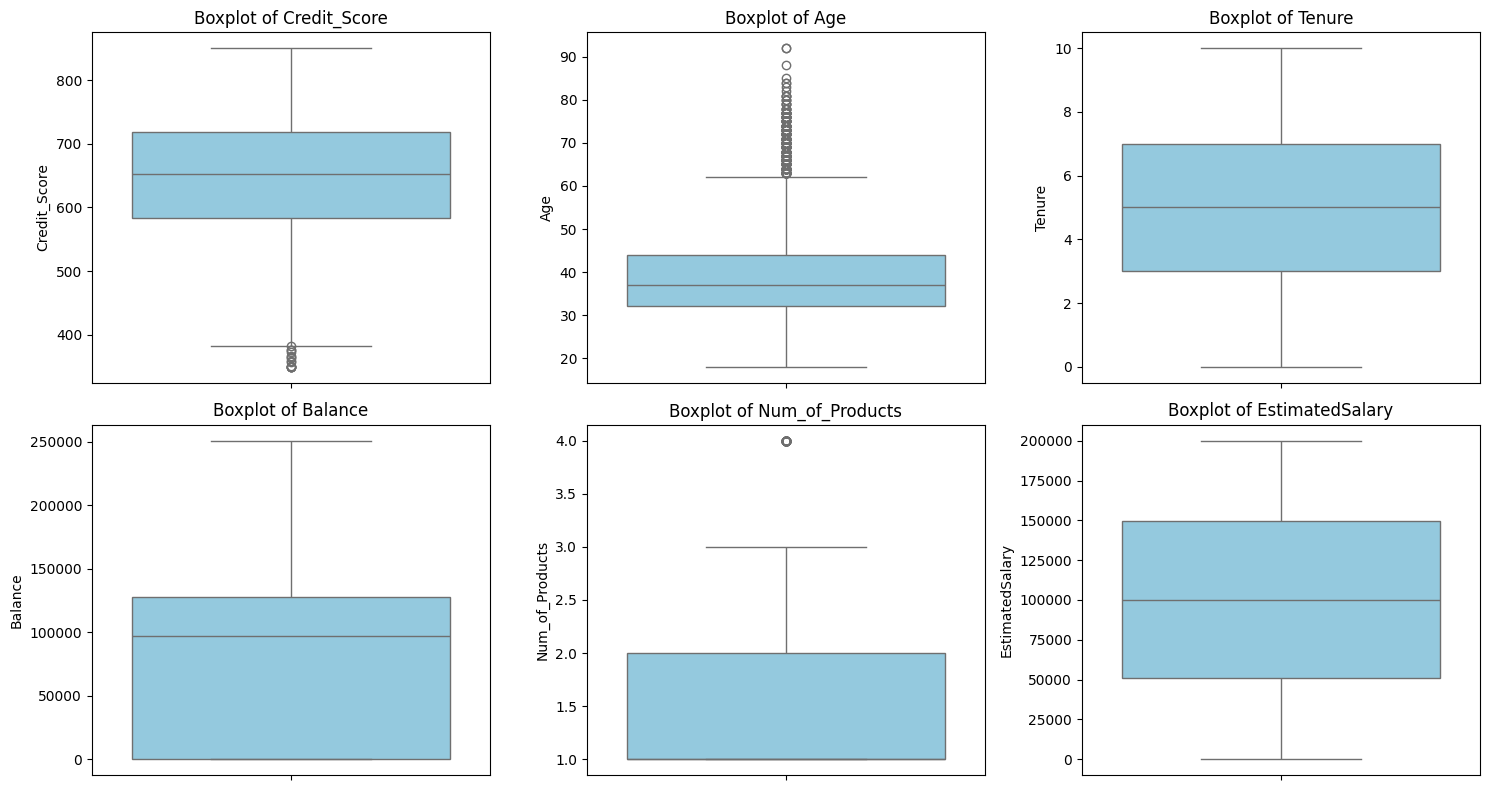

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = ["Credit_Score", "Age", "Tenure", "Balance", "Num_of_Products", "EstimatedSalary"]

# Create subplots: 2 rows × 3 cols
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### Bivariate Analysis

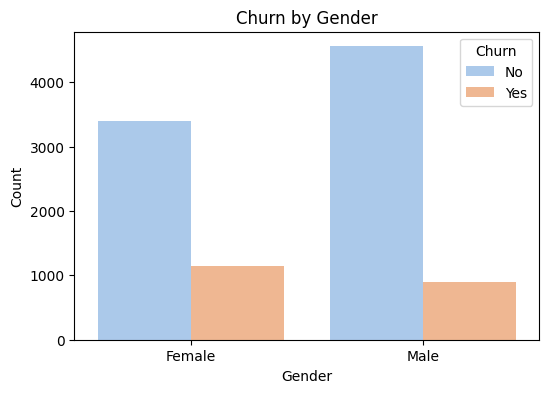

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped countplot of Gender vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Churn", data=df, palette="pastel")

plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])  # adjust labels if needed
plt.show()

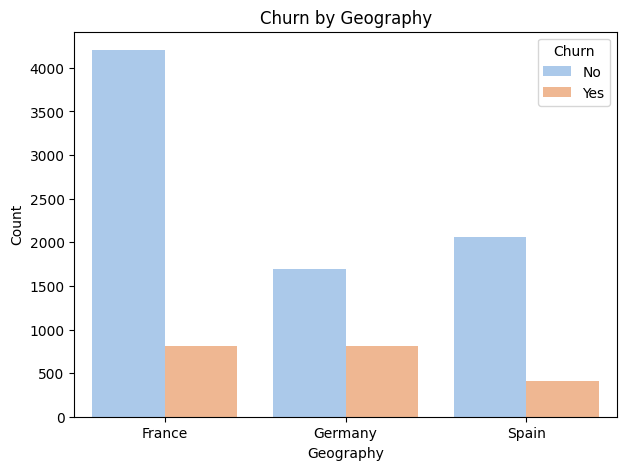

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped countplot of Geography vs Churn
plt.figure(figsize=(7,5))
sns.countplot(x="Geography", hue="Churn", data=df, palette="pastel")

plt.title("Churn by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])  # adjust if your churn codes differ
plt.show()

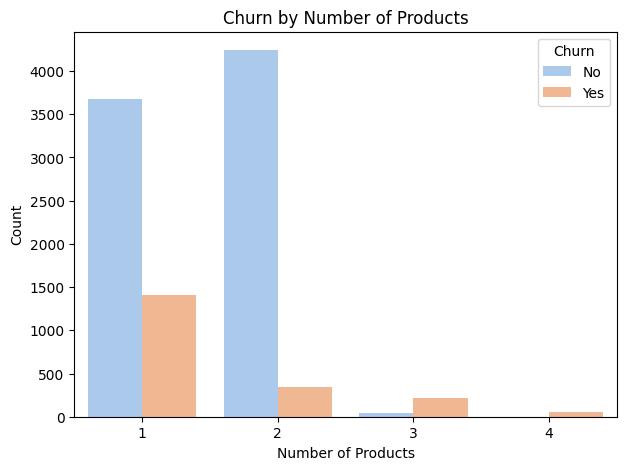

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped countplot of Num_of_Products vs Churn
plt.figure(figsize=(7,5))
sns.countplot(x="Num_of_Products", hue="Churn", data=df, palette="pastel")

plt.title("Churn by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])  # adjust if needed
plt.show()

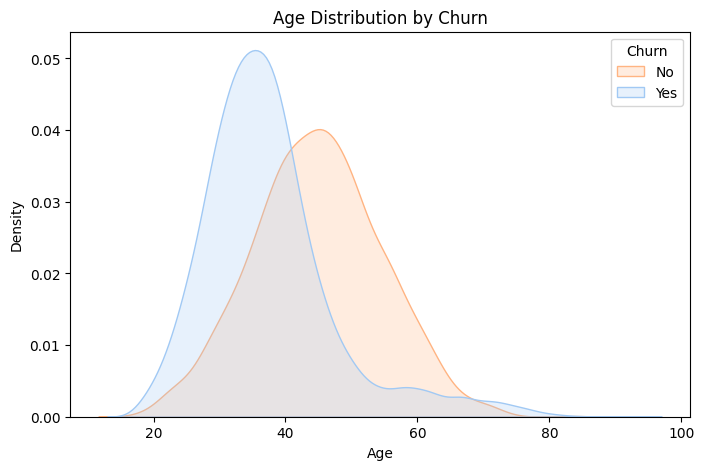

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Age", hue="Churn", fill=True, common_norm=False, palette="pastel")

plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["No", "Yes"])  # adjust if needed
plt.show()

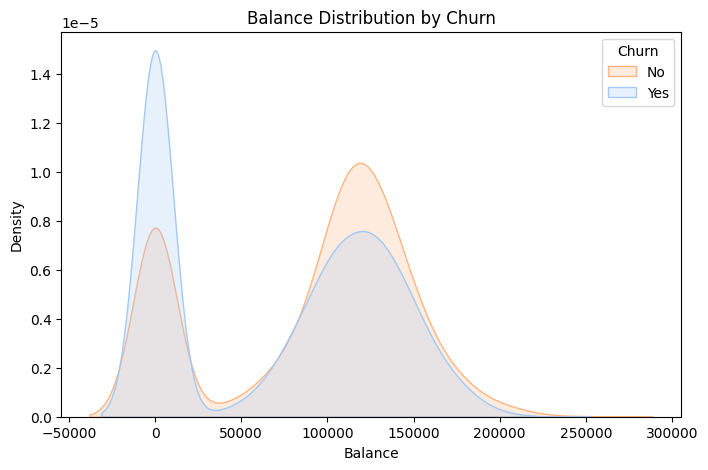

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Balance", hue="Churn", fill=True, common_norm=False, palette="pastel")

plt.title("Balance Distribution by Churn")
plt.xlabel("Balance")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["No", "Yes"])  # adjust if needed
plt.show()

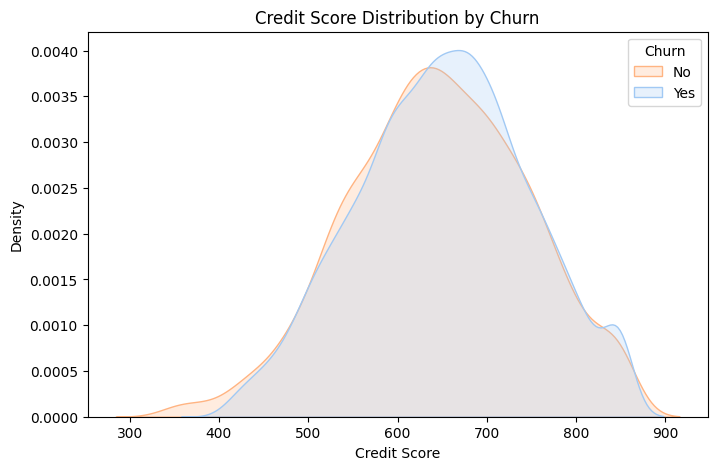

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Credit_Score", hue="Churn", fill=True, common_norm=False, palette="pastel")

plt.title("Credit Score Distribution by Churn")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["No", "Yes"])  # adjust if needed
plt.show()